# Exercise 1

## Setup

First, let us import some packages that are commonly used in this notebook. Please make sure your packages have been upgraded to the latest version if they do not work. This can be done with pip.

pip install \-\-upgrade [package name] (for Python 2)
<br>
pip3 install \-\-upgrade [package name] (for Python 3)

Please note Python 3 is recommended for this course.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, beta
import pandas as pd

from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Visualisation of distributions
In this section, we explore the effect of different parameters in binomial, beta and Gaussian distributions, by visualising probability mass function (PMF), probability density function (PDF) or random variables drawn from the distribution.

### Binomial distribution
In this section we explore how $n$ and $p$ affect the PMF of binomial distribution.

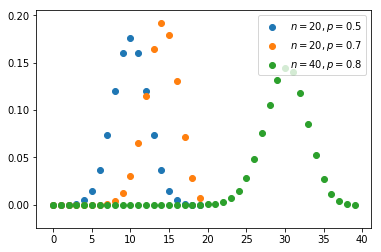

In [2]:
n_s, p_s = [20, 20, 40], [0.5, 0.7, 0.75]

fig, ax = plt.subplots()
for counter in range(3):
    ax.scatter(range(n_s[counter]), 
               binom.pmf(range(n_s[counter]), n_s[counter], p_s[counter]),
               label=r'$n=%d, p=%.1f$' % (n_s[counter], p_s[counter]))
ax.legend(loc='best')

plt.show()

### Beta distribution
This section visualises PDF of beta distribution with various parameters.

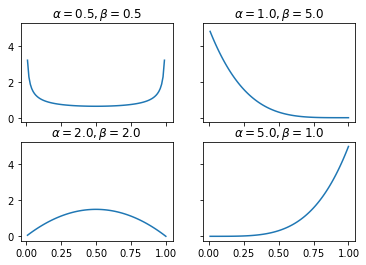

In [3]:
a_s, b_s = [0.5, 1, 2, 5], [0.5, 5, 2, 1]
x_range = np.linspace(0.01, 1, 100)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for counter, ax in enumerate(axes.flat):
    ax.plot(x_range, beta.pdf(x_range, a_s[counter], b_s[counter]))
    ax.set_title(r'$\alpha=%.1f, \beta=%.1f$' % (a_s[counter], b_s[counter]))
    
plt.show()

### Gaussian distribution
Plot random Gaussian variables using various values of mean and standard deviation.

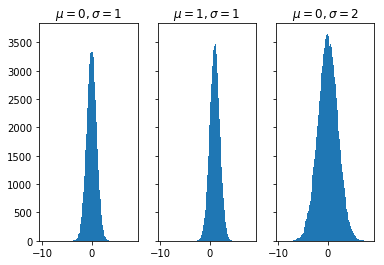

In [4]:
mu_s, sigma_s = [0, 1, 0], [1, 1, 2]

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True)
for counter in range(3):
    axes[counter].hist(np.random.normal(loc=mu_s[counter], scale=sigma_s[counter], size=10**5), 
                     bins=100)
    axes[counter].set_title(r'$\mu=%d, \sigma=%d$' % (mu_s[counter], sigma_s[counter]))
    
plt.show()

Now we generate Gaussian random variables of different size.

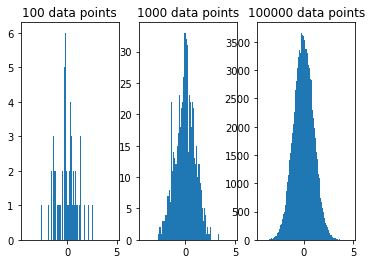

In [5]:
n_samples = [10**2, 10**3, 10**5]

figs,axes = plt.subplots(1, 3, sharex=True)
for counter in range(3):
    axes[counter].hist(np.random.randn(n_samples[counter]), bins=100)
    axes[counter].set_title('%d data points' % n_samples[counter])
    
plt.show()

## End-to-end machine learning project
In this section, we perform regression tasks for predicting housing prices with regression algorithms implemented by _scikit-learn_. _scikit-learn_ is a popular machine learning library, which features various algorithms on classification, regression and clustering. Most algorithms introduced in this course will be implemented in _scikit-learn_.

### Load Boston housing price dataset
Boston housing price dataset contains 506 samples, each of which consists of 13 features and 1 label of housing price values. The features are:

1. CRIM: per capita crime rate by town.
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. NOX: nitrogen oxides concentration (parts per 10 million).
6. RM: average number of rooms per dwelling.
7. AGE: proportion of owner-occupied units built prior to 1940.
8. DIS: weighted mean of distances to five Boston employment centres.
9. RAD: index of accessibility to radial highways.
10. TAX: full-value property-tax rate per $10,000.
11. PTRATIO: pupil-teacher ratio by town.
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13. LSTAT: lower status of the population (percent).

This mini project will let you solve a simple regression problem.

In [6]:
boston = load_boston()
X = boston['data']
y = boston['target']

The full description of Boston housing price dataset can be viewed by the following function.

In [7]:
# print(boston['DESCR'])

### Dataset preprocessing
In this section, we will take a look at different features. Please note that these steps are not required in predicting Boston housing prices, but just give you some insights of various types of data.

#### Missing data items
First let us randomly replace some entries in X with NaN.

In [8]:
np.random.seed(42)

X_new = X.copy()
mask = np.random.randint(0, 2, size=X.shape).astype(np.bool)
X_new[mask] = np.nan

Then we replace the missing values with mean of the corresponding columns.

In [9]:
imp = Imputer(strategy='mean')
X_replace_with_mean = imp.fit_transform(X_new)

/home/fox/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Now please try other strategies (for example, replacing missing values with median or most frequent value).

Hint: check parameter 'strategy' in *sklearn.preprocessing.Imputer* module. You may find *help(Imputer)* helpful.

#### Categorical data
Boston housing price dataset contains one categorical feature -- 'CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)'. This feature contains binary values of two categories. For categorical data with more than two categories, a common technique is one-hot encoding, which converts a coregorical feature into several feature columns that consist of binary values.

In this section we view this feature against the price values using a boxplot.

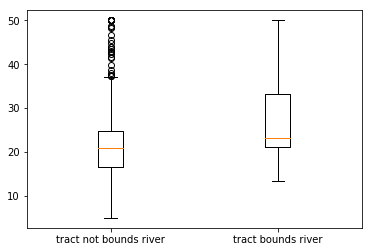

In [10]:
fig, ax = plt.subplots()

ax.boxplot([y[X[:, 3] == 0], y[X[:, 3] == 1]], 
           labels=['tract not bounds river', 'tract bounds river'])
plt.show()

#### Ordinal data
Feature 'RAD: index of accessibility to radial highways' can be considered as ordinal data. We visualise this feature by creating a frequency table.

In [11]:
frequency_count = pd.crosstab(index=X[:, 8], columns="count")
frequency_count

col_0,count
row_0,
1.0,20
2.0,24
3.0,38
4.0,110
5.0,115
6.0,26
7.0,17
8.0,24
24.0,132


### Training and test data
The dataset is generally split into two parts: training set and test set. We use the training set for training a model, and apply the trained model to the test set, in order to evaluate the performance of our model.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardisation of dataset
Standardisation of a dataset is a very common technique in machine learning. This process removes the mean and scales each feature column to unit variance.

In [13]:
# Why do we need standardisation of dataset here?
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Regression
This section solves the regression problem with different methods. We also compute mean squared error (MSE) and mean absolute error (MAE) for future use.

### Regression with average prices
This section predicts the housing prices using average values of training samples.

In [14]:
y_avg = np.ones(len(y_test)) * np.mean(y_train)
# Question: why multiplying a vector by a scalar , what should np.mean(y_train) return?
mse_avg = mean_squared_error(y_test, y_avg)
print(np.mean(y_train))
print(np.ones(len(y_test)))
print("\n y_avg\n\n", y_avg)
print(mse_avg)
mae_avg = mean_absolute_error(y_test, y_avg)

22.796534653465343
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

 y_avg

 [22.79653465 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465
 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465
 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465
 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465
 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465
 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465
 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465
 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465
 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465 22.79653465
 2

### Linear regression

In [24]:
lr = LinearRegression()
print(X_train)
print(X_train[:, 0])
print(X_train[:, counter])
lr.fit(X_train, y_train)

y_lr = lr.predict(X_test)
print("y_lr",y_lr.size,"\n\n", y_lr)
print("y_test \n\n",y_test)

mse_lr = mean_squared_error(y_test, y_lr)
mae_lr = mean_absolute_error(y_test, y_lr)

[[ 1.28770177 -0.50032012  1.03323679 ...  0.84534281 -0.07433689
   1.75350503]
 [-0.33638447 -0.50032012 -0.41315956 ...  1.20474139  0.4301838
  -0.5614742 ]
 [-0.40325332  1.01327135 -0.71521823 ... -0.63717631  0.06529747
  -0.65159505]
 ...
 [-0.40547014  2.95931752 -1.30336132 ... -0.59225149  0.37901005
  -0.91069248]
 [ 0.85189733 -0.50032012  1.03323679 ...  0.84534281 -2.69458597
   1.52257036]
 [-0.38135592 -0.50032012 -0.35216694 ...  1.15981657 -3.12158061
  -0.25731635]]
[ 1.28770177e+00 -3.36384470e-01 -4.03253321e-01  3.88229827e-01
 -3.25282344e-01 -3.85518799e-01 -4.02694886e-01 -4.04845141e-01
  1.30505273e+00  1.22169370e+00 -4.02946464e-01 -3.99392791e-01
 -3.60640829e-01  1.16247710e+00 -3.99731236e-01 -3.12337947e-01
 -3.87611517e-01 -3.97863019e-01 -3.83914569e-01 -3.91335541e-01
  7.88858793e+00 -3.90130677e-01 -3.91200163e-01 -3.67549621e-01
 -4.05053849e-01 -3.96893938e-01 -8.36124378e-03 -4.03126968e-01
 -3.63464589e-01 -3.99577807e-01 -2.54330717e-01 -3.82

Now perform linear regression, but with one feature at a time. Compute the MSEs and MAEs.

In [16]:
# What does one feature at a time mean? -  to base your answers only on one variable at a time
lr=LinearRegression()
print(X_train.shape)
# error?
X_train1=X_train[:,0].reshape(-1, 1)
print(X_train1)
lr.fit(X_train1,y_train)
y_pr=lr.predict(X_test)

# mse_lr = mean_squared_error(y_test, y_lr)
# mae_lr = mean_absolute_error(y_test, y_lr)
# print(mse_lr)
# print(mae_lr)







(404, 13)
[[ 1.28770177e+00]
 [-3.36384470e-01]
 [-4.03253321e-01]
 [ 3.88229827e-01]
 [-3.25282344e-01]
 [-3.85518799e-01]
 [-4.02694886e-01]
 [-4.04845141e-01]
 [ 1.30505273e+00]
 [ 1.22169370e+00]
 [-4.02946464e-01]
 [-3.99392791e-01]
 [-3.60640829e-01]
 [ 1.16247710e+00]
 [-3.99731236e-01]
 [-3.12337947e-01]
 [-3.87611517e-01]
 [-3.97863019e-01]
 [-3.83914569e-01]
 [-3.91335541e-01]
 [ 7.88858793e+00]
 [-3.90130677e-01]
 [-3.91200163e-01]
 [-3.67549621e-01]
 [-4.05053849e-01]
 [-3.96893938e-01]
 [-8.36124378e-03]
 [-4.03126968e-01]
 [-3.63464589e-01]
 [-3.99577807e-01]
 [-2.54330717e-01]
 [-3.82105016e-01]
 [-1.44192792e-01]
 [ 3.19822180e-01]
 [-4.03433825e-01]
 [-4.05547978e-01]
 [-4.05540081e-01]
 [-3.22522888e-01]
 [-3.18693946e-01]
 [-3.99868870e-01]
 [-4.02223320e-01]
 [-3.64769859e-01]
 [ 4.27795430e+00]
 [-4.02319212e-01]
 [-2.47659965e-01]
 [ 6.89870132e-01]
 [-2.95653733e-01]
 [-3.47717868e-01]
 [ 2.22465069e-01]
 [ 7.12508723e-01]
 [-4.03795961e-01]
 [-3.92319288e-01]
 [

ValueError: shapes (102,13) and (1,) not aligned: 13 (dim 1) != 1 (dim 0)

### K nearest neighbour (KNN) regression

In [ ]:
# REPRESENTATION
n_neighbors = 3
neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
neigh.fit(X_train, y_train)

# OPTIMIZATION?
y_neigh = neigh.predict(X_test)
# Question: How is knn measuring distance within the categorical variables?
print(y_neigh)
# EVALUATION
mse_neigh = mean_squared_error(y_test, y_neigh)
print(mse_neigh)
mae_neigh = mean_absolute_error(y_test, y_neigh)
print(mae_neigh)

The number of neighbours in KNN must be pre-defined. We have tried *n_neighbors = 3*. Please try other numbers and compare their MSEs and MAEs.

In [ ]:
# Different k in knn - best for 2!
n_neighbors = 2
neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
neigh.fit(X_train, y_train)

y_neigh = neigh.predict(X_test)
mse_neigh = mean_squared_error(y_test, y_neigh)
print(mse_neigh)
mae_neigh = mean_absolute_error(y_test, y_neigh)
print(mae_neigh)

### Gradient boosting regression

In [ ]:
gb = GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
gb.fit(X_train, y_train)

y_gb = gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_gb)
mae_gb = mean_absolute_error(y_test, y_gb)

A number of parameters can be specified in *sklearn.ensemble.GradientBoostingRegressor* module. In the example above, we set *loss = 'quantile'* with *alpha = 0.95*. Please try different types of loss functions as well as parameters. Compare the performances with MSEs and MAEs.

Hint: you may find the documentation helpful. To view the documentation, use the following command<br>
help(GradientBoostingRegressor).

### Compare performances
This section compares the predictions using different algorithms. We first create some scatter plots to visualise the differences between actual values and the predicted values. 

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True)

mse = [mse_avg, mse_lr, mse_neigh, mse_gb]
mae = [mae_avg, mae_lr, mae_neigh, mae_gb]

titles = ['average y', 'linear regression', 'KNN', 'gradient boosting']
predictions = [y_avg, y_lr, y_neigh, y_gb]

for counter, ax in enumerate(axes.flat):
    ax.scatter(predictions[counter], y_test)
    ax.set_title(titles[counter])

plt.show()

We then view the MAE ans MSE of the predicted values, using pandas.DataFrame().

In [ ]:
errors = pd.DataFrame.from_dict({'MAE': [mae_avg, mae_lr, mae_neigh, mae_gb],
                                 'MSE': [mse_avg, mse_lr, mse_neigh, mse_gb]},
                                 orient='index', columns=titles)
errors

Question:

Do different parameters have effects on the accuracy of our predictions? Could you come up with a method to automatically choose the value of parameters?